In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
combined_df = pd.read_csv('combined_data_outer.csv')
combined_df.head()

,Timestamp,HR,X,Y,Z,PID,Latitude,Longitude
0,2018-11-02 00:26:39,115.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-02 01:49:18,102.0,0.100423,-0.564653,-0.796036,9.0,38.008865,-78.527040
2,2018-11-02 01:50:09,108.0,0.059478,-1.005974,0.237641,9.0,38.014576,-78.525856
3,2018-11-02 01:50:18,107.5,0.060751,-0.670354,-0.669088,9.0,38.015583,-78.525020
4,2018-11-02 01:56:36,91.0,-0.100375,0.973441,0.210622,9.0,38.018010,-78.521300


In [3]:
combined_df.shape

(536982, 8)

In [4]:
combined_df['A'] = np.sqrt(combined_df['X']**2 + combined_df['Y']**2 + combined_df['Z']**2)

combined_df.head()

,Timestamp,HR,X,Y,Z,PID,Latitude,Longitude,A
0,2018-11-02 00:26:39,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-02 01:49:18,102.0,0.100423,-0.564653,-0.796036,9.0,38.008865,-78.527040,0.981117
2,2018-11-02 01:50:09,108.0,0.059478,-1.005974,0.237641,9.0,38.014576,-78.525856,1.035372
3,2018-11-02 01:50:18,107.5,0.060751,-0.670354,-0.669088,9.0,38.015583,-78.525020,0.949076
4,2018-11-02 01:56:36,91.0,-0.100375,0.973441,0.210622,9.0,38.018010,-78.521300,1.001012


In [5]:
combined_df.columns

Index(['Timestamp', 'HR', 'X', 'Y', 'Z', 'PID', 'Latitude', 'Longitude', 'A'], dtype='object')

In [6]:
combined_df = combined_df[['PID','Timestamp', 'HR', 'X', 'Y', 'Z','A','Latitude', 'Longitude']]
combined_df.head()

,PID,Timestamp,HR,X,Y,Z,A,Latitude,Longitude
0,NaN,2018-11-02 00:26:39,115.0,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,2018-11-02 01:49:18,102.0,0.100423,-0.564653,-0.796036,0.981117,38.008865,-78.527040
2,9.0,2018-11-02 01:50:09,108.0,0.059478,-1.005974,0.237641,1.035372,38.014576,-78.525856
3,9.0,2018-11-02 01:50:18,107.5,0.060751,-0.670354,-0.669088,0.949076,38.015583,-78.525020
4,9.0,2018-11-02 01:56:36,91.0,-0.100375,0.973441,0.210622,1.001012,38.018010,-78.521300


In [7]:
#combined_df.to_csv("combined_data_outer_magnitude.csv")

In [8]:
combined_df.dtypes

PID          float64
Timestamp     object
HR           float64
X            float64
Y            float64
Z            float64
A            float64
Latitude     float64
Longitude    float64
dtype: object

In [23]:
combined_df['Datetime'] = pd.to_datetime(combined_df['Timestamp'])
combined_df = combined_df.set_index('Datetime')
df = combined_df.drop(['Timestamp'], axis=1)

In [24]:
df.head()

,PID,HR,X,Y,Z,A,Latitude,Longitude
Datetime,,,,,,,,
2018-11-02 00:26:39,NaN,115.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-02 01:49:18,9.0,102.0,0.100423,-0.564653,-0.796036,0.981117,38.008865,-78.527040
2018-11-02 01:50:09,9.0,108.0,0.059478,-1.005974,0.237641,1.035372,38.014576,-78.525856
2018-11-02 01:50:18,9.0,107.5,0.060751,-0.670354,-0.669088,0.949076,38.015583,-78.525020
2018-11-02 01:56:36,9.0,91.0,-0.100375,0.973441,0.210622,1.001012,38.018010,-78.521300


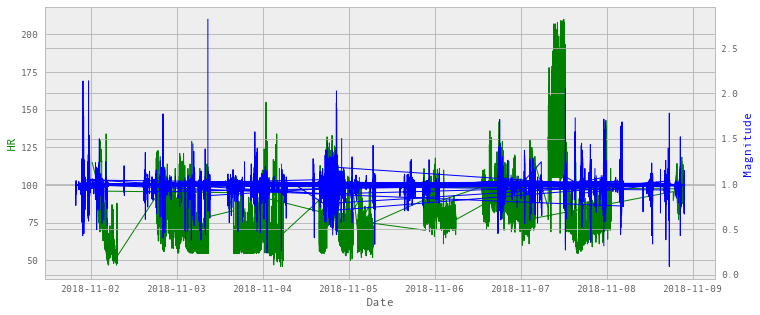

In [36]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(df.index, df['HR'], 'g-')
ax2.plot(df.index, df['A'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('HR', color='g')
ax2.set_ylabel('Magnitude', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 20,10

In [40]:
hourly_summary = pd.DataFrame()
hourly_summary['HR'] = df.HR.resample('H').mean()
hourly_summary['A'] = df.A.resample('H').mean()
hourly_summary.head(20)

,HR,A
Datetime,,
2018-11-01 19:00:00,NaN,0.986306
2018-11-01 20:00:00,NaN,0.986642
2018-11-01 21:00:00,NaN,0.994651
2018-11-01 22:00:00,NaN,0.990747
2018-11-01 23:00:00,NaN,0.996939
2018-11-02 00:00:00,115.000000,0.989265
2018-11-02 01:00:00,99.583333,0.993401
2018-11-02 02:00:00,103.260274,0.990796
2018-11-02 03:00:00,78.140954,0.987228


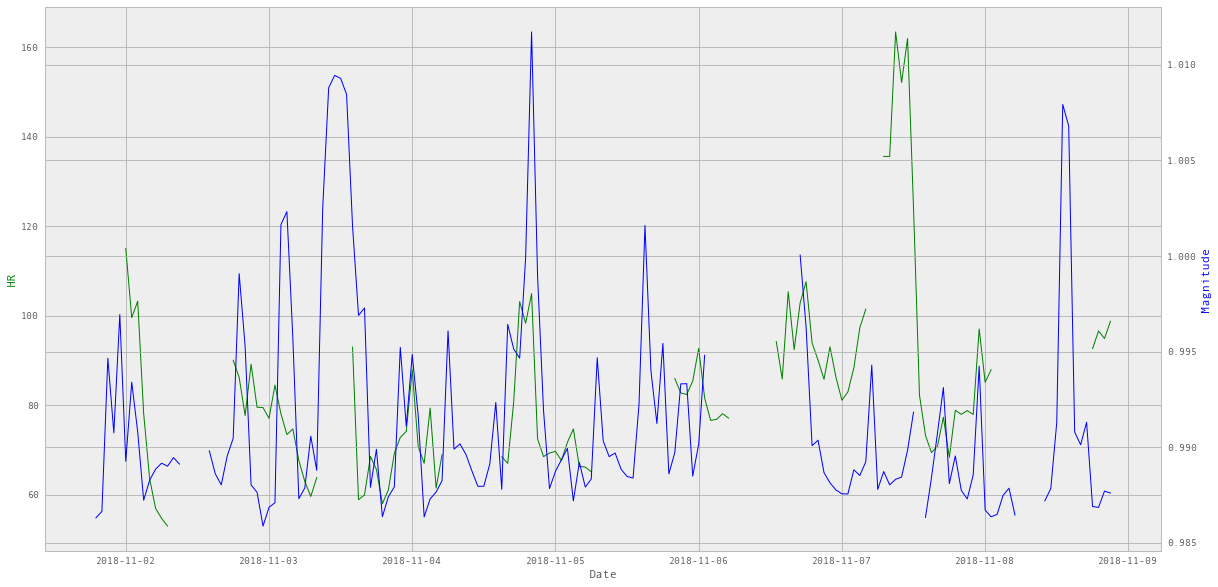

In [39]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(hourly_summary.index, hourly_summary['HR'], 'g-')
ax2.plot(hourly_summary.index, hourly_summary['A'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('HR', color='g')
ax2.set_ylabel('Magnitude', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 20,10

In [41]:
minute_summary = pd.DataFrame()
minute_summary['HR'] = df.HR.resample('T').mean()
minute_summary['A'] = df.A.resample('T').mean()
minute_summary.head(20)

,HR,A
Datetime,,
2018-11-01 19:49:00,NaN,0.989809
2018-11-01 19:50:00,NaN,0.985266
2018-11-01 19:51:00,NaN,0.986058
2018-11-01 19:52:00,NaN,0.982404
2018-11-01 19:53:00,NaN,0.990677
2018-11-01 19:54:00,NaN,0.987329
2018-11-01 19:55:00,NaN,0.986361
2018-11-01 19:56:00,NaN,0.984639
2018-11-01 19:57:00,NaN,0.985453


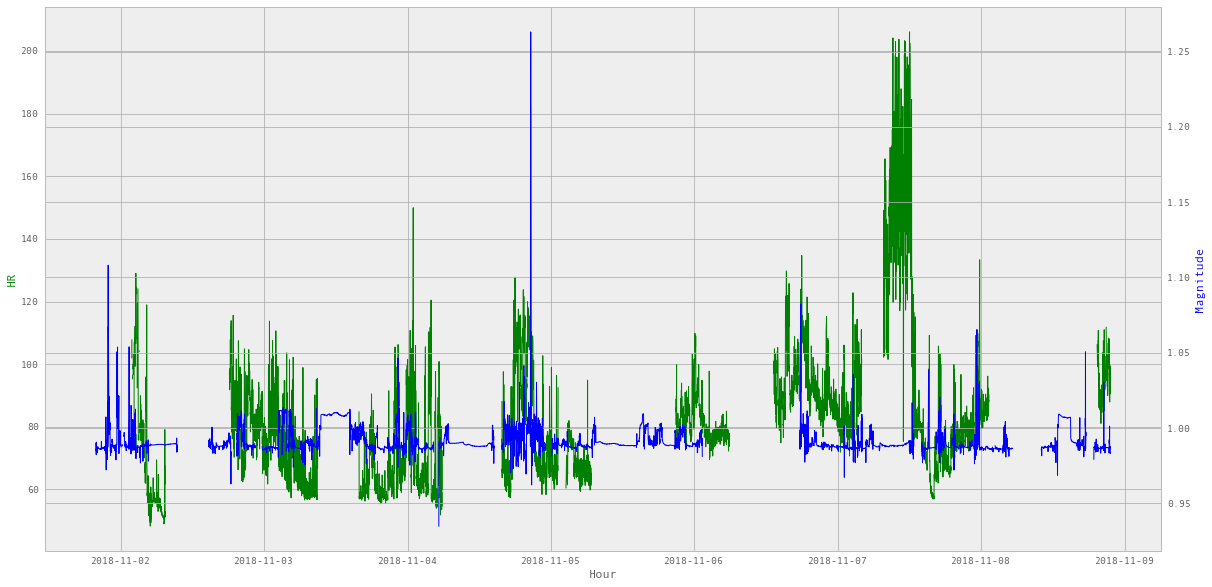

In [43]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(minute_summary.index, minute_summary['HR'], 'g-')
ax2.plot(minute_summary.index, minute_summary['A'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('HR', color='g')
ax2.set_ylabel('Magnitude', color='b')


plt.show()
plt.rcParams['figure.figsize'] = 20,10